In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## A. Decision Tree

### 1. Problem STatement

In [ ]:
Input columns :
A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity	

Output Columns : Quality

### 2. Data Gathering

In [2]:
df = pd.read_csv("1.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


### 3. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
df['Quality'].value_counts()    # 2 categories in target column

Quality
good    2004
bad     1996
Name: count, dtype: int64

### 4. Feature Engineering

#### 4.1 checking for null values

In [6]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
No null values

#### 4.2 Categorical to continous

In [ ]:
No need as all fetures categorical

#### 4.3 Outliers

<Axes: xlabel='Size'>

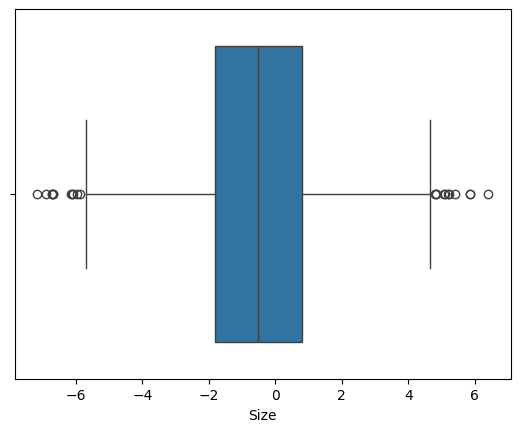

In [9]:
sns.boxplot(x=df['Size']) 

<Axes: xlabel='Size'>

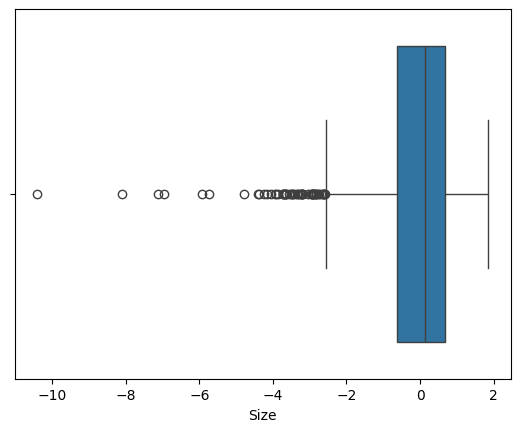

In [13]:
sns.boxplot(x = np.log(df["Size"]))

<Axes: xlabel='Size'>

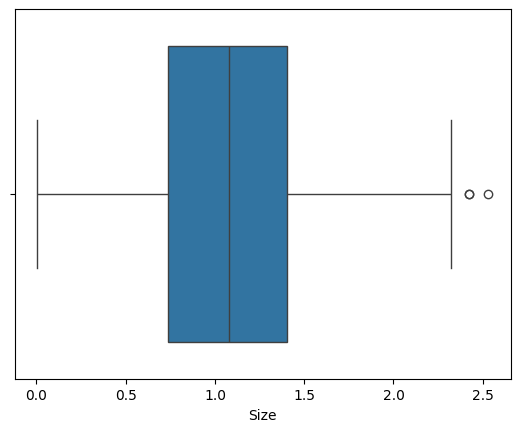

In [14]:
sns.boxplot(x = np.sqrt(df["Size"]))

<Axes: xlabel='Size'>

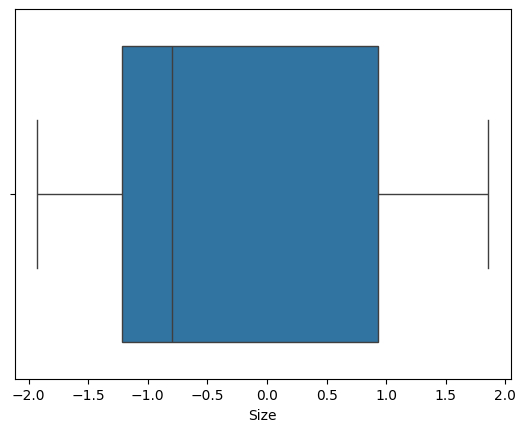

In [12]:
sns.boxplot(x = np.cbrt(df["Size"]))     # cube root does it

In [ ]:
df["Size"] = np.cbrt(df["Size"])

<Axes: xlabel='Weight'>

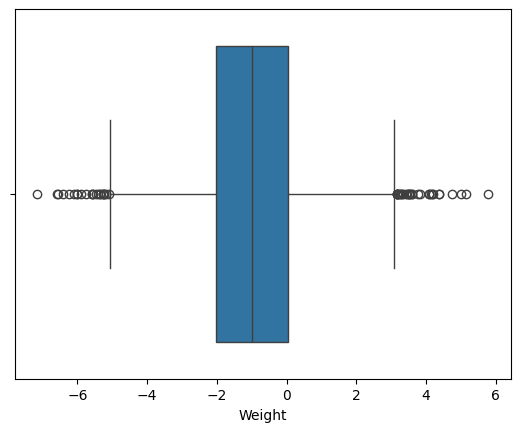

In [15]:
sns.boxplot(x=df['Weight'])


<Axes: xlabel='Weight'>

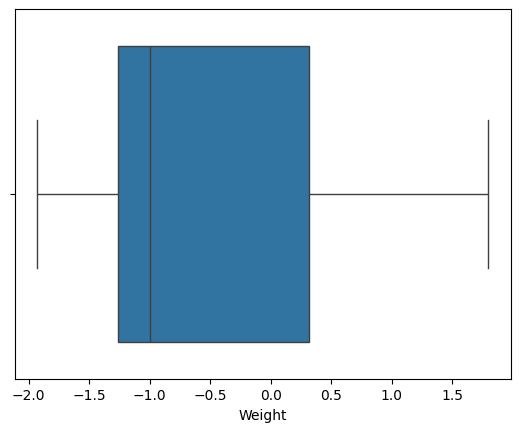

In [16]:
sns.boxplot(x = np.cbrt(df["Weight"])) 

In [17]:
df["Weight"] = np.cbrt(df["Weight"])

<Axes: xlabel='Sweetness'>

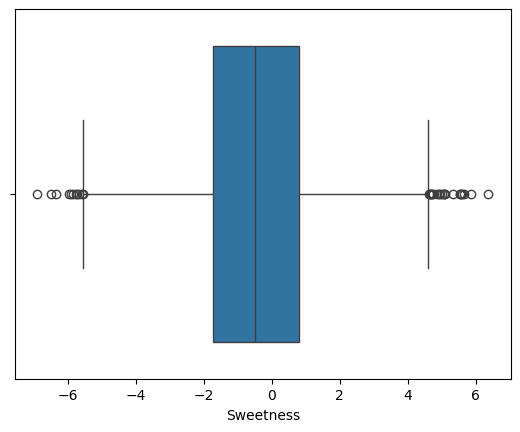

In [19]:
sns.boxplot(x=df['Sweetness'])

<Axes: xlabel='Crunchiness'>

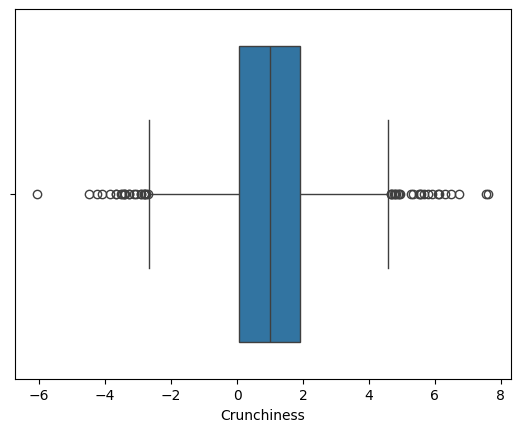

In [21]:
sns.boxplot(x=df['Crunchiness'])

<Axes: xlabel='Juiciness'>

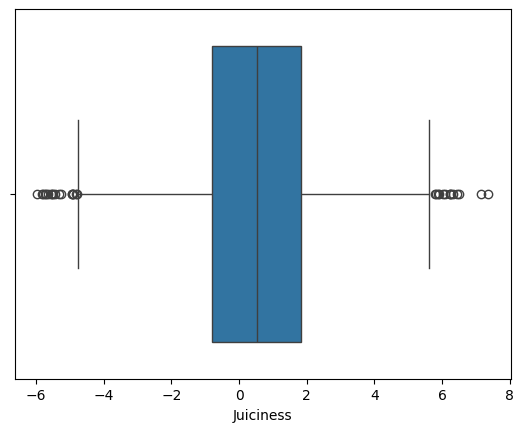

In [22]:
sns.boxplot(x=df['Juiciness'])

<Axes: xlabel='Ripeness'>

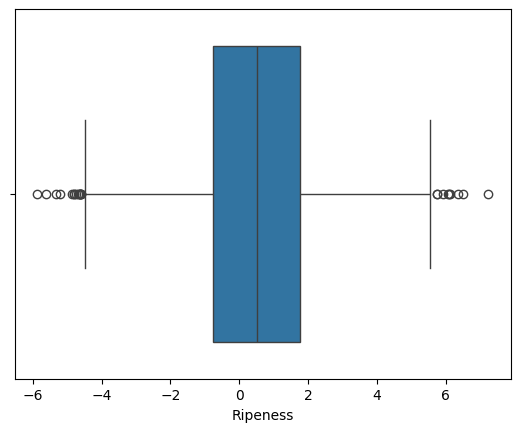

In [23]:
sns.boxplot(x=df['Ripeness'])

<Axes: xlabel='Acidity'>

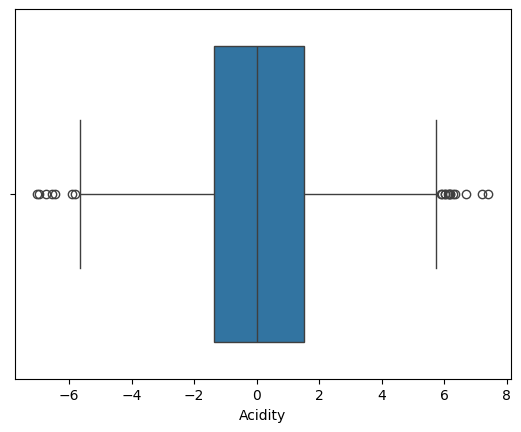

In [24]:
sns.boxplot(x=df['Acidity'])

<Axes: xlabel='Quality'>

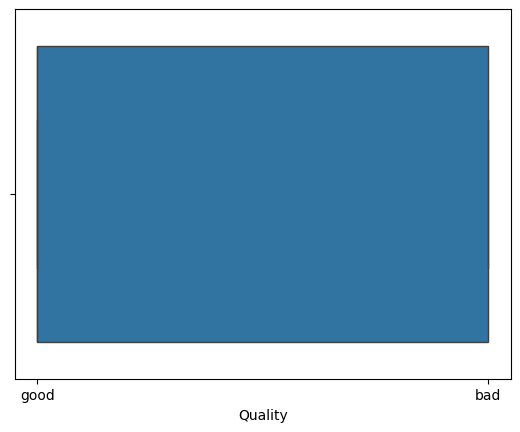

In [25]:
sns.boxplot(x=df['Quality'])

In [20]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [26]:
df["Sweetness"] = np.cbrt(df["Sweetness"])
df["Crunchiness"] = np.cbrt(df["Crunchiness"])
df["Juiciness"] = np.cbrt(df["Juiciness"])
df["Ripeness"] = np.cbrt(df["Ripeness"])
df["Acidity"] = np.cbrt(df["Acidity"])


<Axes: xlabel='Acidity'>

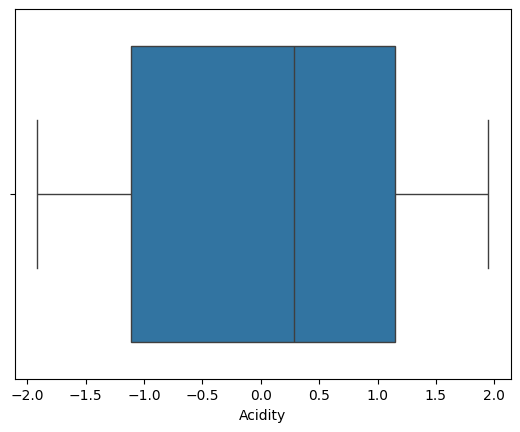

In [27]:
sns.boxplot(x=df['Acidity'])

In [ ]:
Conclusion : Outliers Removed

### 5. Feature Selection

In [ ]:
feature selection is generally not that important in decision tree.During the induction of decision trees,
the optimal feature is selected to split the data based on metrics like information gain, so if you have
some non-informative features, they simply wont be selected.

### 6. Model Training

In [3]:
x = df.drop('Quality',axis=1)
y = df['Quality']
x_train_act,x_test_act,y_train_act,y_test_act = train_test_split(x,y, test_size=0.2, random_state=8, stratify=y)

In [4]:
dt_clf = DecisionTreeClassifier(random_state=1)   # default criteria='gini'
dt_clf.fit(x_train_act,y_train_act)

DecisionTreeClassifier(random_state=1)

In [ ]:
import pickle
with open("apple.pkl",'wb') as f:
    pickle.dump(dt_clf, f)

### 7. Evaluation

In [30]:
dt_clf.score(x_train_act, y_train_act)

1.0

In [31]:
dt_clf.score(x_test_act, y_test_act)

0.8

In [32]:
#train eval
y_train_pred = dt_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_pred,y_train_act)
accuracy = accuracy_score(y_train_pred,y_train_act)
clf_report = classification_report(y_train_pred,y_train_act)
print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[1597    0]
 [   0 1603]]

Accuracy : 1.0

Classification report :
               precision    recall  f1-score   support

         bad       1.00      1.00      1.00      1597
        good       1.00      1.00      1.00      1603

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [33]:
#test eval
y_test_pred = dt_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_pred,y_test_act)
accuracy = accuracy_score(y_test_pred,y_test_act)
clf_report = classification_report(y_test_pred,y_test_act)
print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[328  89]
 [ 71 312]]

Accuracy : 0.8

Classification report :
               precision    recall  f1-score   support

         bad       0.82      0.79      0.80       417
        good       0.78      0.81      0.80       383

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



In [34]:
dt_clf.feature_importances_ 

array([0.02763219, 0.14227091, 0.11179417, 0.17172504, 0.09127934,
       0.13350966, 0.1767903 , 0.14499838])

### 8. Hyperparameter Tuning

In [37]:
dt_model = DecisionTreeClassifier(random_state=2)

hyp_grid = {
            "criterion" :['gini','entropy'],
            "max_depth" : np.arange(3,10),
            "min_samples_split" : range(5,20),
            "min_samples_leaf" : range(3,15)}

gscv_dt_model = GridSearchCV(dt_model, param_grid = hyp_grid, cv=3, n_jobs=-1)
gscv_dt_model.fit(x_train_act, y_train_act)   

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 15),
                         'min_samples_split': range(5, 20)})

In [38]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       min_samples_split=5, random_state=2)

In [39]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train_act,y_train_act)
print("train:",dt_clf.score(x_train_act,y_train_act))
print("test:",dt_clf.score(x_test_act,y_test_act))

train: 0.8634375
test: 0.81


### 9. feature importance

In [40]:
dt_clf.feature_importances_ 

array([0.01434136, 0.22446023, 0.12220914, 0.19217873, 0.08591773,
       0.15491436, 0.09880545, 0.10717301])

In [ ]:
feature 1 and 6 are almost redundant

In [ ]:
Conclusion:
Before : 1 -- 0.8
after : 0.86 -- 0.81

## B. RandomFOrest

### 1. Model Train

In [16]:
rf_clf = RandomForestClassifier(n_estimators=100,  criterion='gini', random_state=8)
rf_clf.fit(x_train_act, y_train_act)

RandomForestClassifier(random_state=8)

### 2. Evaluation

In [17]:
# Training Data Evaluation
y_train_pred = rf_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[1597    0]
 [   0 1603]]

Accuracy : 1.0

Classification report :
               precision    recall  f1-score   support

         bad       1.00      1.00      1.00      1597
        good       1.00      1.00      1.00      1603

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [18]:
# Test Data Evaluation
y_test_pred = rf_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[358  41]
 [ 43 358]]

Accuracy : 0.895

Classification report :
               precision    recall  f1-score   support

         bad       0.89      0.90      0.90       399
        good       0.90      0.89      0.90       401

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



### 3. Hyperpara Tuning

In [19]:
rf_model = RandomForestClassifier(random_state=1, n_jobs = -1)

hyp_grid = {"n_estimators":np.arange(10,80,5),
            "criterion" : ['gini','entropy'],
            "max_depth" : np.arange(4,10),
            "min_samples_split" : range(8,15),
            "min_samples_leaf" : range(4,8)}

gscv_rf_model = GridSearchCV(rf_model,param_grid = hyp_grid, cv = 3,n_jobs  = -1)
gscv_rf_model.fit(x_train_act, y_train_act)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(4, 8),
                         'min_samples_split': range(8, 15),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])})

In [20]:
gscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=45, n_jobs=-1, random_state=1)

In [21]:
rf_clf = gscv_rf_model.best_estimator_
rf_clf.fit(x_train_act,y_train_act)
print('Train Accuracy :',rf_clf.score(x_train_act, y_train_act))
print("Test Accuracy  :",rf_clf.score(x_test_act, y_test_act))

Train Accuracy : 0.9296875
Test Accuracy  : 0.87625


In [ ]:
Coonclusion:
Before :  1.0  0.89
after :  0.93  0.88

## C. AdaBoost

### 1. Model Training

In [24]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(x_train_act,y_train_act)

AdaBoostClassifier()

### 2. Model Evaluation

In [25]:
# Train Eval
y_train_pred = adb_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)    
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print("Confusion Matrix :\n", cnf_matrix, end='\n\n')
print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1253  344]
 [ 313 1290]]

Accuracy : 0.7946875

Classification Report :
               precision    recall  f1-score   support

         bad       0.80      0.78      0.79      1597
        good       0.79      0.80      0.80      1603

    accuracy                           0.79      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.79      0.79      0.79      3200



In [26]:
# Test Eval
y_test_pred = adb_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)    
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix :\n", cnf_matrix, end='\n\n')
print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[314  85]
 [ 94 307]]

Accuracy : 0.77625

Classification Report :
               precision    recall  f1-score   support

         bad       0.77      0.79      0.78       399
        good       0.78      0.77      0.77       401

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800



### 3. Hyperparameter Tuning

In [43]:
adb_clf = AdaBoostClassifier(random_state=23)
hyp_grid = {'n_estimators':range(10,100,4),
            'learning_rate':np.arange(0,1,0.1)}
adb_gscv_model = GridSearchCV(adb_clf, param_grid=hyp_grid, cv=3)
adb_gscv_model.fit(x_train_act, y_train_act)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=23),
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': range(10, 100, 4)})

In [44]:
adb_gscv_model.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=78, random_state=23)

In [45]:
adb_clf = adb_gscv_model.best_estimator_

y_train_pred = adb_clf.predict(x_train_act)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Accuracy : 0.803125

Classification Report :
               precision    recall  f1-score   support

         bad       0.81      0.79      0.80      1597
        good       0.80      0.81      0.81      1603

    accuracy                           0.80      3200
   macro avg       0.80      0.80      0.80      3200
weighted avg       0.80      0.80      0.80      3200



In [46]:
adb_clf = adb_gscv_model.best_estimator_

y_test_pred = adb_clf.predict(x_test_act)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)
print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Accuracy : 0.7975

Classification Report :
               precision    recall  f1-score   support

         bad       0.79      0.80      0.80       399
        good       0.80      0.79      0.80       401

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



In [ ]:
Conclusion :   train    test
initial         0.79    0.77
Hyp_tune        0.80    0.79

## D. KNN

### 1. Model training

In [47]:
knn_clf = KNeighborsClassifier(n_neighbors=8,p=2)   
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=8)

### 2. Model Evaluation

In [48]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.65125
test accuracy: 0.5


In [49]:
y_train_pred = knn_clf.predict(x_train_act)           # train eval
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)
print("Confusion Matrix :\n",cnf_matrix,end='\n\n')
print("Accuracy :", accuracy,end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1300  297]
 [ 819  784]]

Accuracy : 0.65125

Classification Report :
               precision    recall  f1-score   support

         bad       0.61      0.81      0.70      1597
        good       0.73      0.49      0.58      1603

    accuracy                           0.65      3200
   macro avg       0.67      0.65      0.64      3200
weighted avg       0.67      0.65      0.64      3200



In [50]:
y_test_pred = knn_clf.predict(x_test_act)                 # test eval
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix :\n",cnf_matrix,end='\n\n')
print("Accuracy :", accuracy,end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[263 136]
 [264 137]]

Accuracy : 0.5

Classification Report :
               precision    recall  f1-score   support

         bad       0.50      0.66      0.57       399
        good       0.50      0.34      0.41       401

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.49       800
weighted avg       0.50      0.50      0.49       800



### 3. Best p,k values

Text(0, 0.5, 'Accuracy')

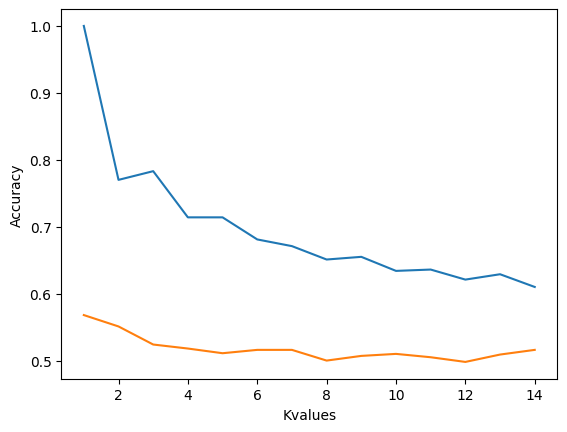

In [51]:
k_values = np.arange(1,15)     
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)   
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    

Text(0, 0.5, 'Accuracy')

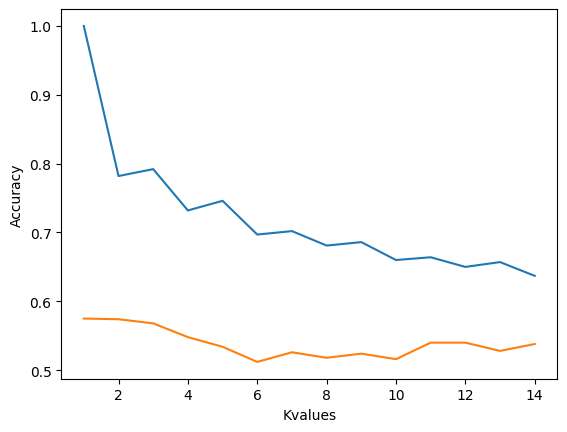

In [52]:
k_values = np.arange(1,15)           # p=1
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)   
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    

In [ ]:
Best value at k=2, p=1

### 4. Trying with best values

In [53]:
knn_clf = KNeighborsClassifier(n_neighbors=2,p=1)   
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=2, p=1)

In [54]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.7821875
test accuracy: 0.57375


### D.2 With scaling

#### 1. Training with Normalized data

In [56]:
std_scaler = StandardScaler()
df_x = std_scaler.fit_transform(x)

In [57]:
x_train_act, x_test_act, y_train_act, y_test_act = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [58]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=2)           
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=4)

#### 2. Evaluation

In [59]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.883125
test accuracy: 0.82875


#### 3. Finding best k values

Text(0, 0.5, 'Accuracy')

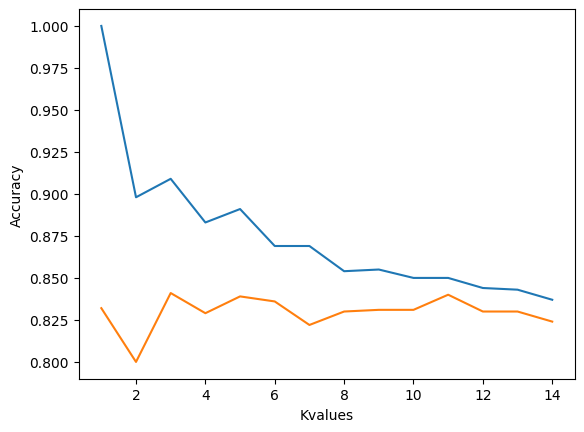

In [60]:
k_values = np.arange(1,15)     
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)     # x axis, y axis
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    # Blue is train accuracy, orange is test accuracy

Text(0, 0.5, 'Accuracy')

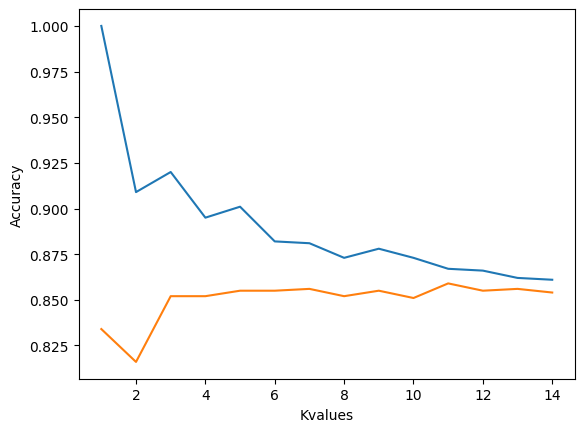

In [61]:
k_values = np.arange(1,15)    
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)     # x axis, y axis
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    # Blue is train accuracy, orange is test accuracy

In [ ]:
Best value at : k=4, p=1

In [62]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=1)           
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=4, p=1)

In [63]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.8946875
test accuracy: 0.8525


In [ ]:
Conclusion:
without scaling : 0.78 -- 0.57
with scaling : 0.89 -- 0.85

## conclusion

In [ ]:
              Initial            after hyp_para_tune

           Train     Test         Train     Test

Dec Tree    1.0      .8           .86      .81  
RF          1.0      0.89         0.93    0.88
AdaBoost    0.79     0.77         0.80     0.79
KNN         0.78 -- 0.57          0.89     0.86